# Step 1: Reading and Understanding the Data

In [449]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [450]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [451]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [452]:
# Check the head of the dataset
 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [453]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [454]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [455]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [456]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [457]:
# checking the shape of dataframe

df.shape

(730, 16)

In [458]:
# Check the head of the dataset

df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [459]:
# Copying the dataframe into new

df_copy = df.copy()

In [460]:
# checking the shape of new dataframe

df_copy.shape

(730, 16)

In [461]:
# dropping the duplicates

df_copy.drop_duplicates(inplace=True)

In [462]:
# re-verifying the shape of new dataframe

df_copy.shape

(730, 16)

In [463]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [464]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

#### As the shape is same after dropping duplicates, It indicates no duplicates in the original dataframe.

In [465]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [466]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [467]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [468]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [469]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Step 2: Visualising the Data 

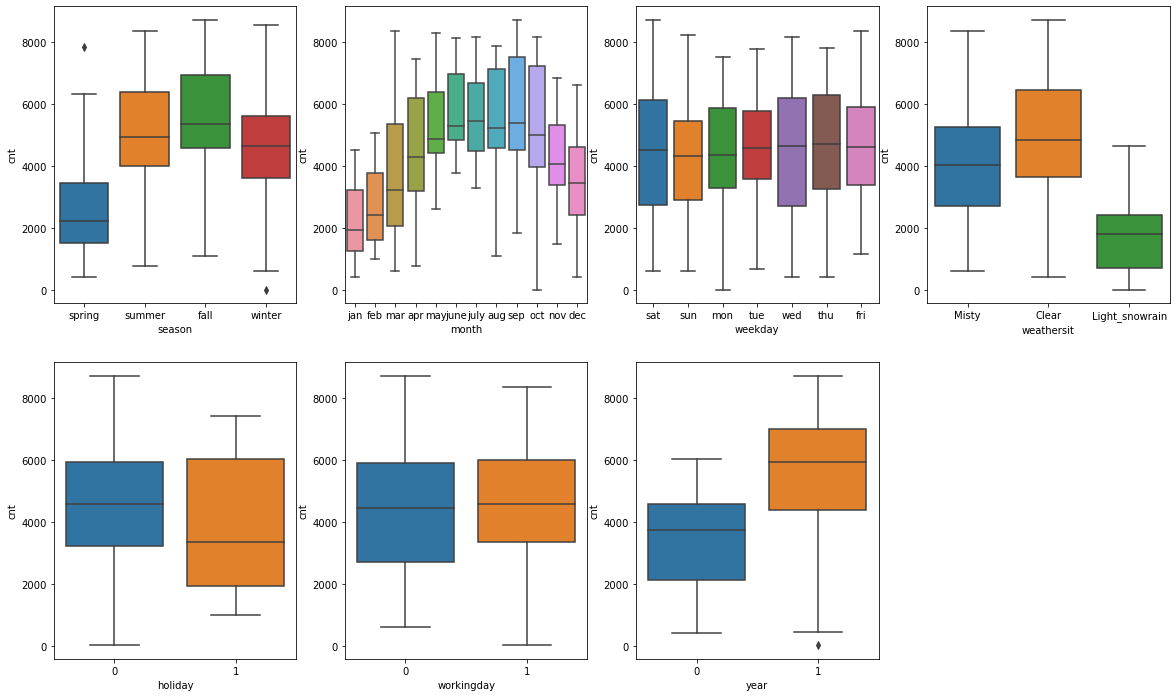

In [470]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [471]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

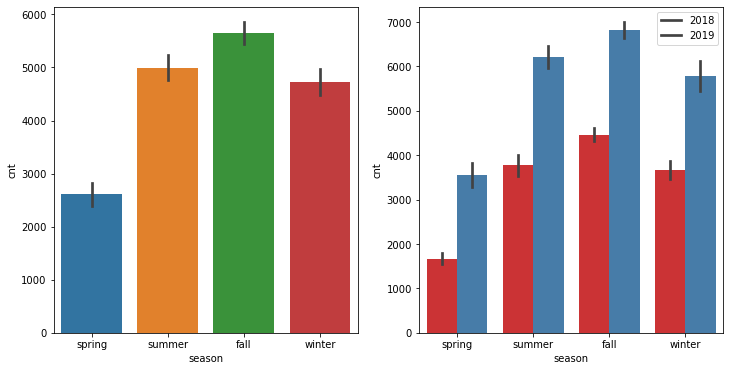

In [472]:
# plotting visualization for season column

plot_cat_columns('season')

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

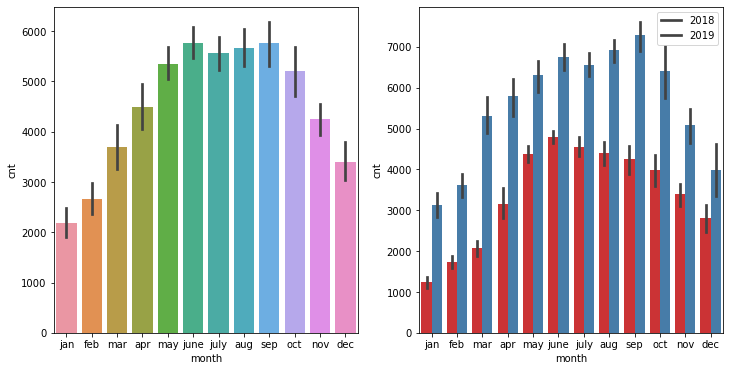

In [473]:
# plotting visualization for month column

plot_cat_columns('month')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019

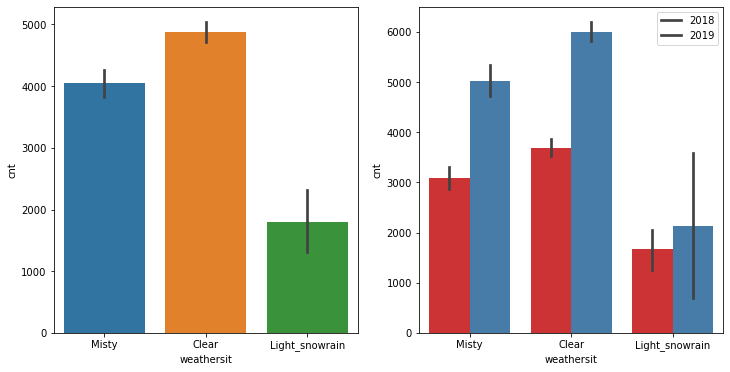

In [474]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

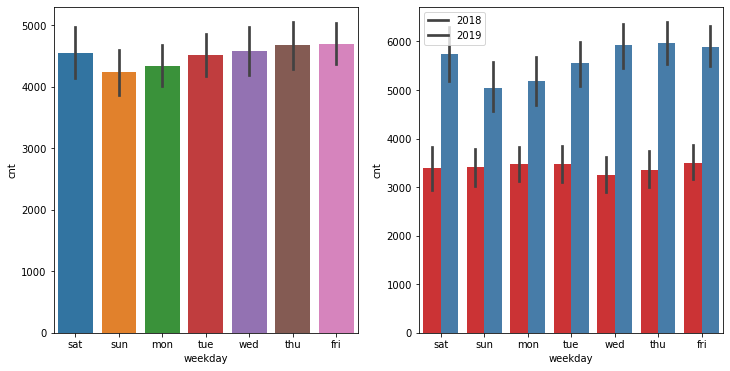

In [475]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

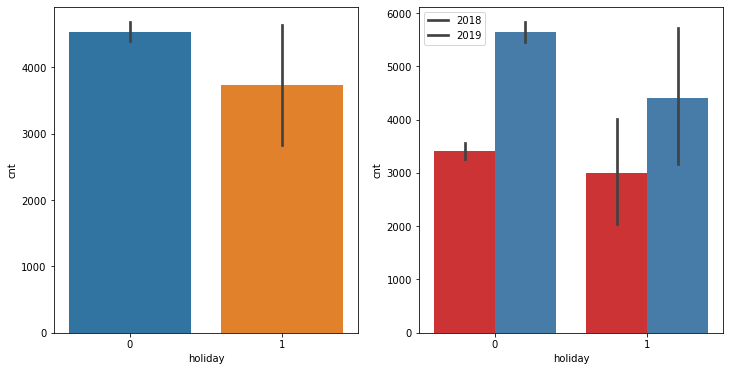

In [476]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

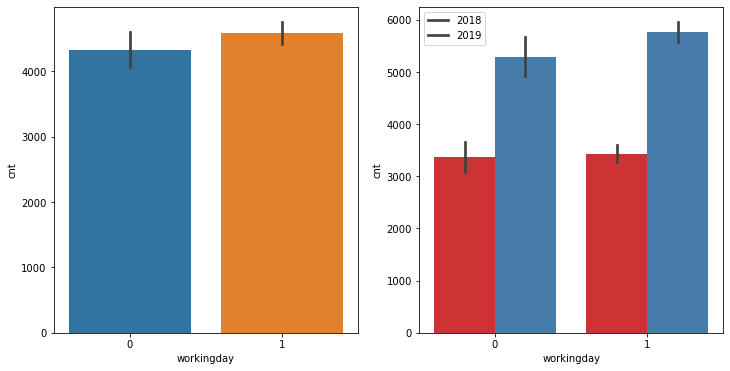

In [477]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

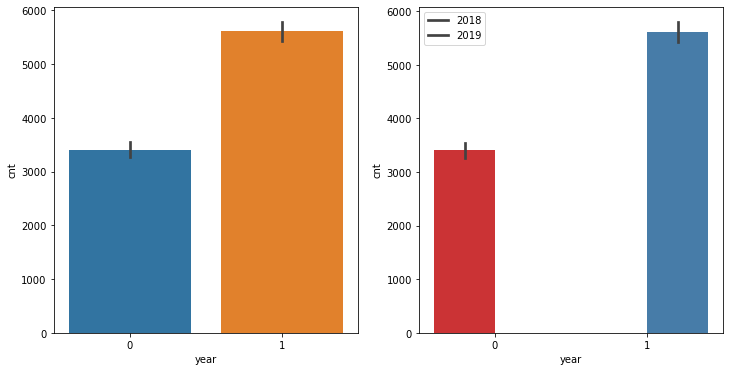

In [478]:
# plotting visualization for year column

plot_cat_columns('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

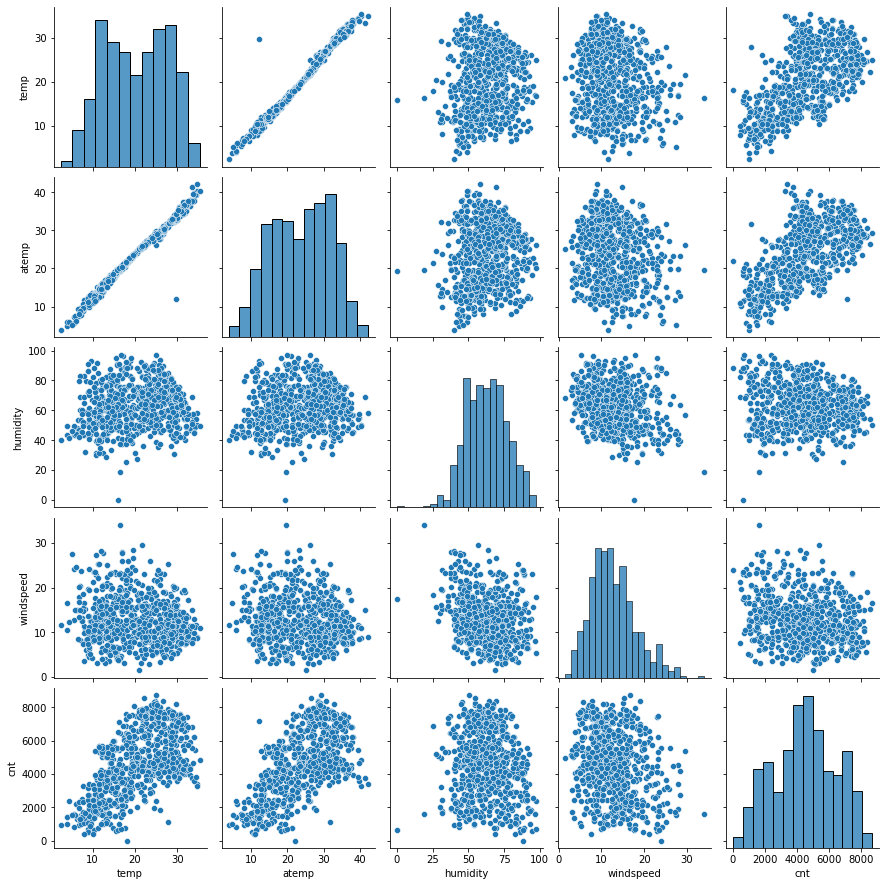

In [479]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

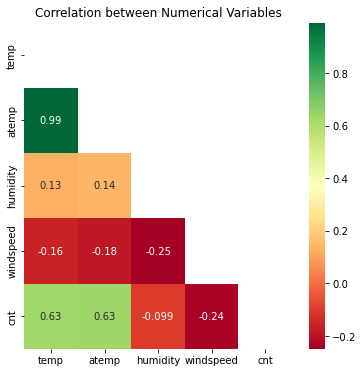

In [480]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

# Step 3: Data Preparation

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

In [481]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=False)
weekdays_df=pd.get_dummies(df.weekday,drop_first=False)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=False)
seasons_df=pd.get_dummies(df.season,drop_first=False)

In [482]:
print(months_df)

     apr  aug  dec  feb  jan  july  june  mar  may  nov  oct  sep
0      0    0    0    0    1     0     0    0    0    0    0    0
1      0    0    0    0    1     0     0    0    0    0    0    0
2      0    0    0    0    1     0     0    0    0    0    0    0
3      0    0    0    0    1     0     0    0    0    0    0    0
4      0    0    0    0    1     0     0    0    0    0    0    0
..   ...  ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...
725    0    0    1    0    0     0     0    0    0    0    0    0
726    0    0    1    0    0     0     0    0    0    0    0    0
727    0    0    1    0    0     0     0    0    0    0    0    0
728    0    0    1    0    0     0     0    0    0    0    0    0
729    0    0    1    0    0     0     0    0    0    0    0    0

[730 rows x 12 columns]


In [483]:
print(weekdays_df)

     fri  mon  sat  sun  thu  tue  wed
0      0    0    1    0    0    0    0
1      0    0    0    1    0    0    0
2      0    1    0    0    0    0    0
3      0    0    0    0    0    1    0
4      0    0    0    0    0    0    1
..   ...  ...  ...  ...  ...  ...  ...
725    0    0    0    0    1    0    0
726    1    0    0    0    0    0    0
727    0    0    1    0    0    0    0
728    0    0    0    1    0    0    0
729    0    1    0    0    0    0    0

[730 rows x 7 columns]


In [484]:
print(weathersit_df)

     Clear  Light_snowrain  Misty
0        0               0      1
1        0               0      1
2        1               0      0
3        1               0      0
4        1               0      0
..     ...             ...    ...
725      0               0      1
726      0               0      1
727      0               0      1
728      1               0      0
729      0               0      1

[730 rows x 3 columns]


In [485]:
print(seasons_df)

     fall  spring  summer  winter
0       0       1       0       0
1       0       1       0       0
2       0       1       0       0
3       0       1       0       0
4       0       1       0       0
..    ...     ...     ...     ...
725     0       1       0       0
726     0       1       0       0
727     0       1       0       0
728     0       1       0       0
729     0       1       0       0

[730 rows x 4 columns]


In [486]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [488]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [489]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,thu,tue,wed,Clear,Light_snowrain,Misty,fall,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,1,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,1,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,1,0,0,0,1,0,0


In [490]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  apr             730 non-null    uint8  
 13  aug             730 non-null    uint8  
 14  dec             730 non-null    uint8  
 15  feb             730 non-null    uint8  
 16  jan             730 non-null    uint8  
 17  july            730 non-null    uin

In [491]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [492]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,apr,aug,...,thu,tue,wed,Clear,Light_snowrain,Misty,fall,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,1,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,1,0,0,0,1,0,0


In [493]:
# check the shape of new dataframe

df_new.shape

(730, 34)

In [494]:
# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   apr             730 non-null    uint8  
 9   aug             730 non-null    uint8  
 10  dec             730 non-null    uint8  
 11  feb             730 non-null    uint8  
 12  jan             730 non-null    uint8  
 13  july            730 non-null    uint8  
 14  june            730 non-null    uint8  
 15  mar             730 non-null    uint8  
 16  may             730 non-null    uint8  
 17  nov             730 non-null    uin

# Step 4: Splitting the Data into Training and Testing Sets

In [495]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [496]:
# check the shape of training datatset

df_train.shape

(510, 34)

In [497]:
# check the shape of testing datatset

df_test.shape

(220, 34)

In [498]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [499]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,apr,aug,...,thu,tue,wed,Clear,Light_snowrain,Misty,fall,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,1,0,1,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,1,0,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,1,0,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,1,0,0,1,0


In [500]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [501]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,apr,aug,...,thu,tue,wed,Clear,Light_snowrain,Misty,fall,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,1,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,1,0,0,1,0


In [502]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,apr,aug,...,thu,tue,wed,Clear,Light_snowrain,Misty,fall,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.078431,0.096078,...,0.133333,0.131373,0.158824,0.625490,0.029412,0.345098,0.262745,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.269113,0.294988,...,0.340268,0.338139,0.365870,0.484471,0.169124,0.475867,0.440557,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


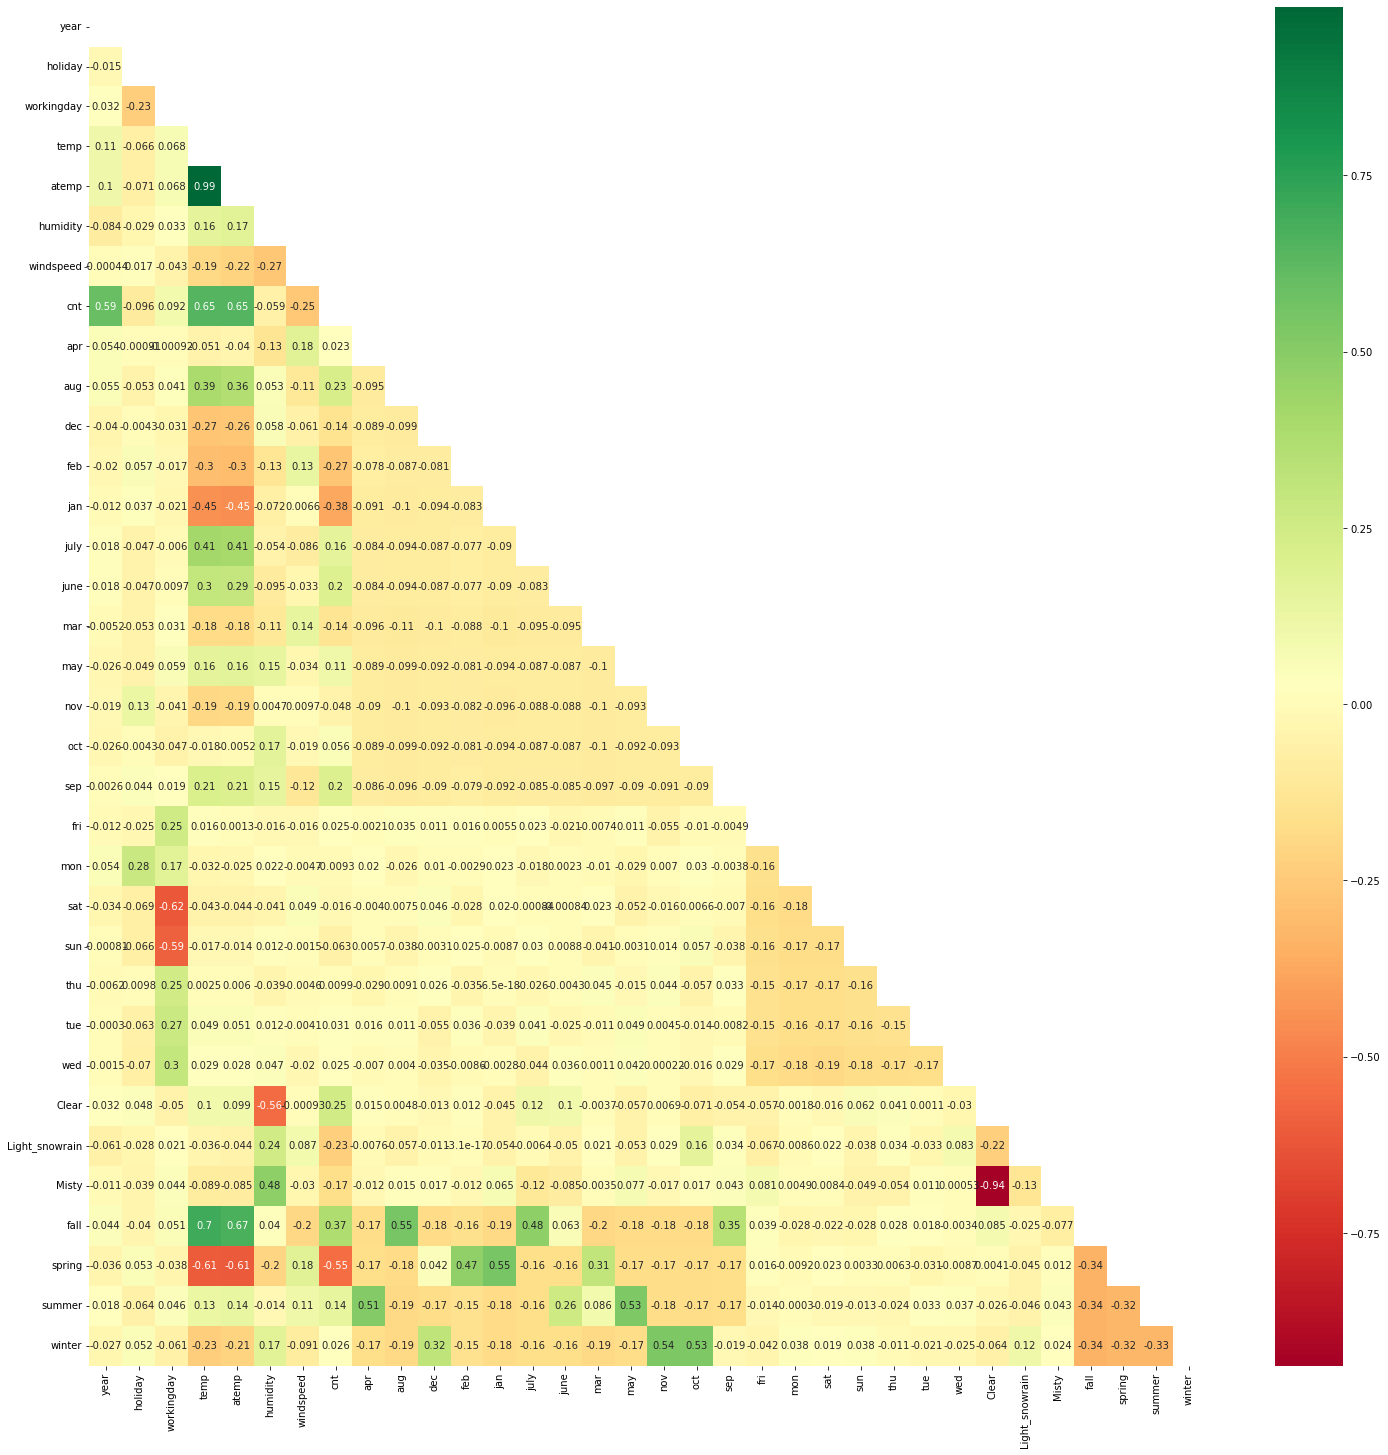

In [503]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

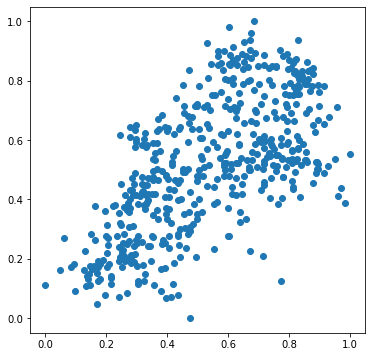

In [504]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [505]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

Visualization confirms the positive correlation between temp and cnt.

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

In [506]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [507]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('apr', False, 17),
 ('aug', False, 8),
 ('dec', False, 2),
 ('feb', False, 6),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 15),
 ('mar', False, 16),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 14),
 ('sep', True, 1),
 ('fri', False, 13),
 ('mon', False, 11),
 ('sat', False, 3),
 ('sun', False, 10),
 ('thu', False, 18),
 ('tue', False, 12),
 ('wed', False, 19),
 ('Clear', True, 1),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('fall', False, 7),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1)]

In [508]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('apr', False, 17),
 ('aug', False, 8),
 ('dec', False, 2),
 ('feb', False, 6),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 15),
 ('mar', False, 16),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 14),
 ('sep', True, 1),
 ('fri', False, 13),
 ('mon', False, 11),
 ('sat', False, 3),
 ('sun', False, 10),
 ('thu', False, 18),
 ('tue', False, 12),
 ('wed', False, 19),
 ('Clear', True, 1),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('fall', False, 7),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1)]

In [509]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'jan',
       'july', 'nov', 'sep', 'Clear', 'Light_snowrain', 'Misty', 'spring',
       'winter'],
      dtype='object')


In [510]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'apr', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'oct',
       'fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'fall', 'summer'],
      dtype='object')

In [511]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [512]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [513]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,temp,52.82
3,atemp,51.64
10,Clear,38.70
12,Misty,27.06
11,Light_snowrain,3.76
13,spring,2.74
14,winter,2.14
4,humidity,1.89
6,jan,1.56
8,nov,1.47


Temp shows high VIF value

# Step 5: Building a linear model

In [514]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.68e-187
Time:                        21:47:51   Log-Likelihood:                 507.25
No. Observations:                 510   AIC:                            -984.5
Df Residuals:                     495   BIC:                            -921.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1906      0.027      7.

In [515]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
9,Clear,38.58
11,Misty,27.01
10,Light_snowrain,3.74
2,atemp,3.15
12,spring,2.68
13,winter,2.06
3,humidity,1.89
5,jan,1.56
7,nov,1.47
6,july,1.29


VIF values seems to be good now. But we will see if we can reduce further ?

In [516]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.57e-186
Time:                        21:47:52   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1950      0.027      7.

In [517]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
8,Clear,38.17
10,Misty,26.79
9,Light_snowrain,3.73
2,atemp,3.11
11,spring,2.66
3,humidity,1.89
12,winter,1.74
5,jan,1.56
6,july,1.29
4,windspeed,1.20


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [518]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.53e-187
Time:                        21:47:52   Log-Likelihood:                 501.74
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     497   BIC:                            -922.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1911      0.027      7.

In [519]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['Clear'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,23.75
2,atemp,15.95
4,windspeed,3.96
10,spring,2.85
9,Misty,2.24
0,year,2.06
11,winter,2.04
5,jan,1.67
6,july,1.40
8,Light_snowrain,1.22


In [520]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.53e-187
Time:                        21:47:52   Log-Likelihood:                 501.74
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     497   BIC:                            -922.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3525      0.032     11.

In [521]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.54
3,windspeed,3.91
9,spring,2.23
0,year,2.06
4,jan,1.60
8,Misty,1.53
10,winter,1.39
5,july,1.35
6,sep,1.20
7,Light_snowrain,1.08


In [522]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.26e-184
Time:                        21:47:52   Log-Likelihood:                 493.13
No. Observations:                 510   AIC:                            -962.3
Df Residuals:                     498   BIC:                            -911.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2697      0.025     10.

In [523]:
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.54
3,windspeed,3.91
9,spring,2.23
0,year,2.06
4,jan,1.60
8,Misty,1.53
10,winter,1.39
5,july,1.35
6,sep,1.20
7,Light_snowrain,1.08


##### We can cosider the above model i.e lr_5, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

VIF value now seems to be good as it came below 5.

### F-Statistics value of 223.5 (which is greater than 1) and the p-value of zero, states that the overall model is significant

In [524]:
# Checking the parameters and their coefficient values
lr_5.params

const             0.269673
year              0.235954
holiday          -0.093874
atemp             0.443428
windspeed        -0.134535
jan              -0.043070
july             -0.064818
sep               0.060585
Light_snowrain   -0.282493
Misty            -0.079300
spring           -0.109152
winter            0.032841
dtype: float64

# Step 6: Residual Analysis of the train data and validation

In [525]:
X_train_lm_5

,const,year,holiday,atemp,windspeed,jan,july,sep,Light_snowrain,Misty,spring,winter
576,1.0,1,0,0.766351,0.264686,0,1,0,0,0,0,0
426,1.0,1,0,0.438975,0.255342,0,0,0,0,1,1,0
728,1.0,1,0,0.200348,0.663106,0,0,0,0,0,1,0
482,1.0,1,0,0.391735,0.188475,0,0,0,0,1,0,0
111,1.0,0,0,0.318819,0.380981,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.824359,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.218747,0.111379,0,0,0,0,0,1,0
350,1.0,0,0,0.223544,0.431816,0,0,0,0,1,0,1
79,1.0,0,0,0.434043,0.529881,0,0,0,0,1,0,0


In [526]:
y_train_pred = lr_5.predict(X_train_lm_5)

Normality of error terms

Text(0.5, 0, 'Errors')

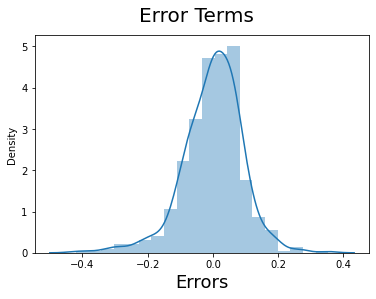

In [527]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

Multi Colinearity

In [528]:
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.54
3,windspeed,3.91
9,spring,2.23
0,year,2.06
4,jan,1.60
8,Misty,1.53
10,winter,1.39
5,july,1.35
6,sep,1.20
7,Light_snowrain,1.08


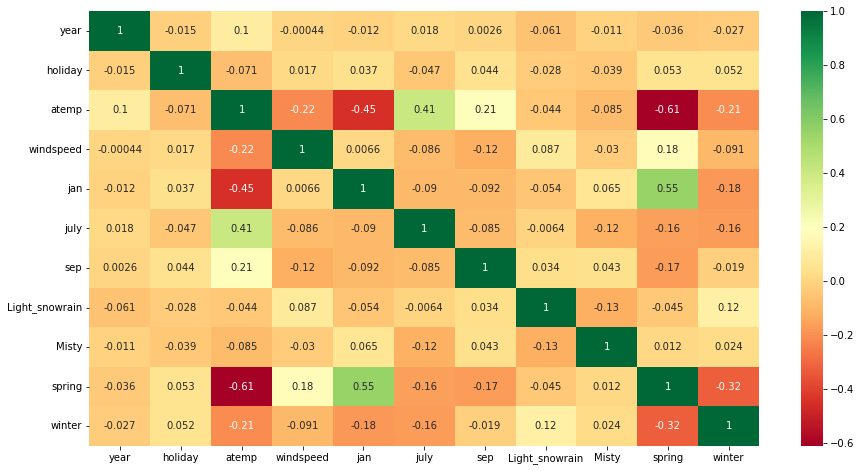

In [529]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

Linearity

Linearity can be observed from above visualizations.

Homoscedasticity

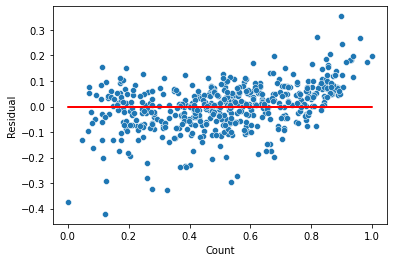

In [530]:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

##### Independence of residuals¶

Durbin-Watson value of final model lr_5 is 2.034, which signifies there is no autocorrelation.

# Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [531]:
# Applying scaling on the test dataset

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,apr,aug,...,thu,tue,wed,Clear,Light_snowrain,Misty,fall,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,1,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,1,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,1,1,0,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,1,0,0,0,0,1,0


In [532]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,apr,aug,...,thu,tue,wed,Clear,Light_snowrain,Misty,fall,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.090909,0.059091,...,0.163636,0.168182,0.100000,0.654545,0.027273,0.318182,0.245455,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.288135,0.236333,...,0.370789,0.374881,0.300684,0.476601,0.163248,0.466833,0.431338,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [533]:
y_test = df_test.pop('cnt')
X_test = df_test

In [534]:
y_test.describe

<bound method NDFrame.describe of 184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64>

In [535]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [536]:
X_test_lm_5

,const,year,holiday,atemp,windspeed,jan,july,sep,Light_snowrain,Misty,spring,winter
184,1.0,0,1,0.769660,0.084219,0,1,0,0,1,0,0
535,1.0,1,0,0.842587,0.153728,0,0,0,0,0,0,0
299,1.0,0,0,0.496145,0.334206,0,0,0,0,1,0,1
221,1.0,0,0,0.795343,0.339570,0,0,0,0,0,0,0
152,1.0,0,0,0.741471,0.537414,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,0.511907,0.283397,0,0,0,0,0,0,1
127,1.0,0,0,0.577380,0.069510,0,0,0,0,0,0,0
640,1.0,1,0,0.682653,0.052115,0,0,0,0,1,0,1
72,1.0,0,0,0.332005,0.203418,0,0,0,0,0,1,0


In [537]:
y_pred = lr_5.predict(X_test_lm_5)

In [538]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8055

# Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values

Text(0, 0.5, 'y_pred')

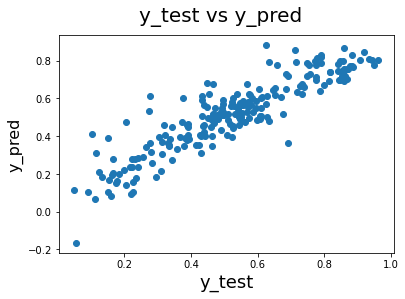

In [539]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [540]:
round(lr_5.params,4)

const             0.2697
year              0.2360
holiday          -0.0939
atemp             0.4434
windspeed        -0.1345
jan              -0.0431
july             -0.0648
sep               0.0606
Light_snowrain   -0.2825
Misty            -0.0793
spring           -0.1092
winter            0.0328
dtype: float64

We can see that the equation of our best fitted line is:

𝑐𝑛𝑡=0.1909+0.2341×𝑦𝑒𝑎𝑟−0.0963×ℎ𝑜𝑙𝑖𝑑𝑎𝑦+0.4777×𝑡𝑒𝑚𝑝−0.1481×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑+0.0910×𝑠𝑒𝑝−0.2850×𝐿𝑖𝑔ℎ𝑡𝑠𝑛𝑜𝑤𝑟𝑎𝑖𝑛−0.0787×𝑀𝑖𝑠𝑡𝑦−0.0554×𝑠𝑝𝑟𝑖𝑛𝑔+0.0621×𝑠𝑢𝑚𝑚𝑒𝑟+0.0945×𝑤𝑖𝑛𝑡𝑒𝑟

In [541]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7952


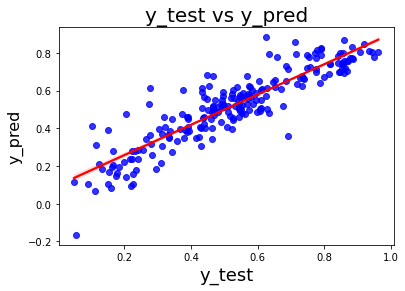

In [542]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.832
- Test dataset R^2           : 0.8055
- Train dataset Adjusted R^2 : 0.828    
- Test dataset Adjusted R^2  : 0.7952
Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.